# Análisis exploratorio  

In [1]:
from ucimlrepo import fetch_ucirepo 
import funciones as fn
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
datos = fetch_ucirepo(id=544)

In [2]:
import pandas as pd
X=datos["data"]["features"]
Y=datos["data"]["targets"]
df=pd.concat([pd.DataFrame(X),pd.DataFrame(Y)],axis=1)
df_copy=df.copy()
variables_nonimales=[]
variables_ordinales=[]
variables_numericas=[]

Este conjunto de datos incluye datos para la estimación de niveles de obesidad en individuos de los países de México, Perú y Colombia, en función de sus hábitos alimentarios y condición física. Los datos contienen 17 atributos y 2111 registros, los registros están etiquetados con la variable de clase NObesity (Nivel de Obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I. , Obesidad Tipo II y Obesidad Tipo III. El 77% de los datos se generaron de forma sintética utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recogieron directamente de los usuarios a través de una plataforma web.

In [3]:
df
#df_copy.to_csv('../Datos/obesity.csv')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Nivel de obesidad	

La obesidad es una condición en la que hay una acumulación anormal o excesiva de grasa corporal, lo cual puede ser perjudicial para la salud. Aquí están los niveles y definiciones relacionados con el sobrepeso y la obesidad:

**Sobrepeso:**

*   Índice de Masa Corporal (IMC) igual o superior a 25.
*   El IMC se calcula dividiendo el peso de una persona en kilogramos por el cuadrado de su talla en metros (kg/m²).
*   El sobrepeso se aplica a adultos.
*   Es importante tener en cuenta que el IMC es un valor aproximado y puede variar según la constitución individual.

**Obesidad:**

*   IMC igual o superior a 30.
*   La obesidad también se aplica a adultos.
*   Existen diferentes grados de obesidad:
*   Obesidad tipo I: IMC entre 30 y 34.9.
*   Obesidad tipo II (preobesidad): IMC entre 35 y 39.9.
*   Obesidad tipo III / Obesidad Mórbida: IMC igual o mayor a 40 123.

<Axes: xlabel='NObeyesdad'>

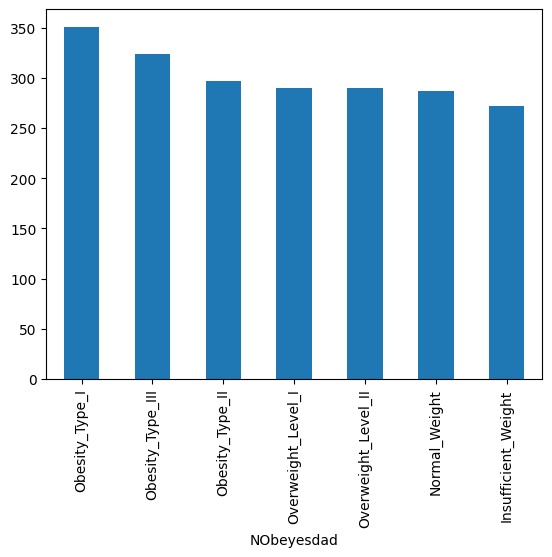

In [4]:

df['NObeyesdad'].value_counts().plot.bar()

<Axes: ylabel='count'>

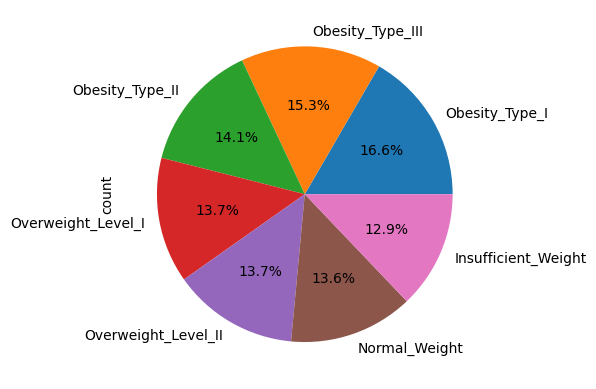

In [5]:

df['NObeyesdad'].value_counts().plot.pie(autopct='%1.1f%%')

## Variable Gender

La cantidad de hombres y mujeres en la base son aproximadamente equilibradas 


<Axes: title={'center': 'Frecuencia de genero'}, xlabel='Gender'>

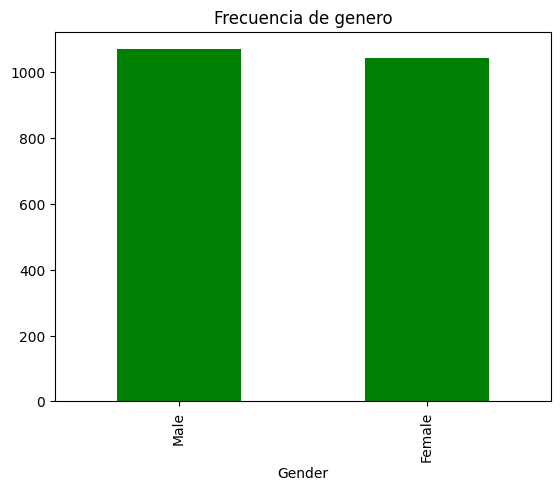

In [6]:

df["Gender"].value_counts().plot.bar(x="genero",
                                     y="frecuencia",
                                     title="Frecuencia de genero",
                                     color="green")

En la siguiente tabla podemos observar que el porcentaje de mujeres con obesidad es mayor que para los hombres. 

In [7]:
variables_nonimales.append("Gender")
pd.crosstab(df["Gender"], df["NObeyesdad"], normalize="index").round(4) * 100


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,16.59,13.52,14.96,0.19,30.97,13.90,9.88
Male,9.27,13.67,18.26,27.62,0.09,13.58,17.51


Para la codificación de esta variación utilizaremos en OneHotEncoder

## AGE

*   No se observan anomalías en la variable
*   Como es de esperarce se ve una asimetría positiva

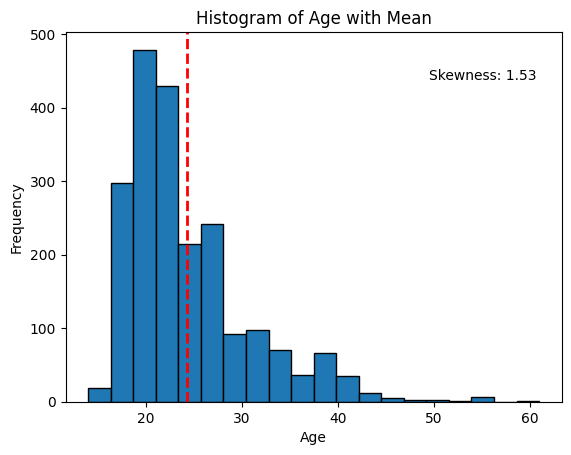

In [8]:
from scipy.stats import skew
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age with Mean')

skewness = skew(df['Age'])
plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()



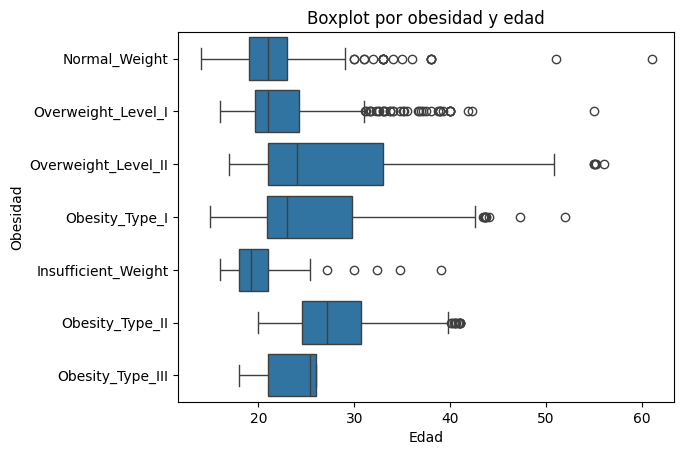

In [9]:
variables_numericas.append("Age")

import seaborn as sns

sns.boxplot(data=df, x="Age", y="NObeyesdad")

# Add title and labels
plt.title("Boxplot por obesidad y edad")
plt.xlabel("Edad")
plt.ylabel("Obesidad")

# Show the plot
plt.show()


Para la variable de edad, vamos a usar el método de escalamiento MinMax

## Estatura 

*   No se observan anomalías en la variable
*   Como es de esperarce se ve una simetría en el histograma y poca Kurtosis

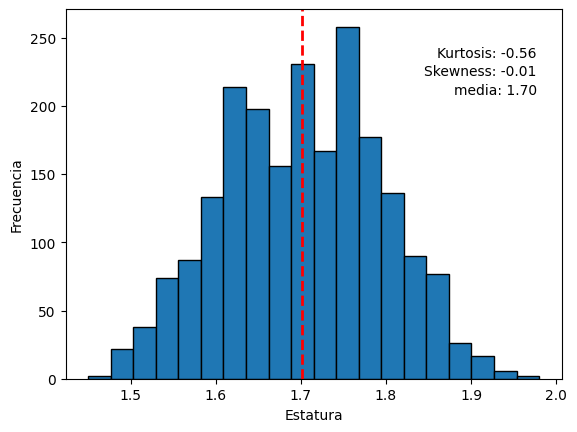

In [10]:
plt.hist(df['Height'], bins=20, edgecolor='black')
plt.axvline(df['Height'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Estatura')
plt.ylabel('Frecuencia')

kurtosis = df['Height'].kurtosis()
skewness = df['Height'].skew()
media=df['Height'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()


Por motivos académicos, esta variable no se tendrá en cuenta en este proyecto. 

## PESO

*   No se observan anomalías en la variable
*   Como es de esperarce se ve una pequeña asimetría y Kurtosis en el histograma



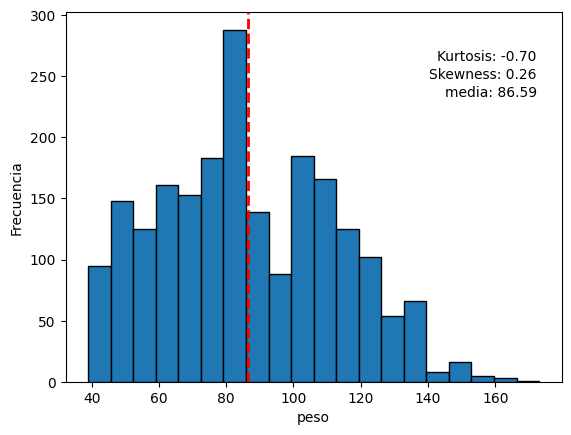

In [11]:
plt.hist(df['Weight'], bins=20, edgecolor='black')
plt.axvline(df['Weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('peso')
plt.ylabel('Frecuencia')

kurtosis = df['Weight'].kurtosis()
skewness = df['Weight'].skew()
media=df['Weight'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

Por motivos académicos, esta variable no se tendrá en cuenta en este proyecto. 

# Historial de la familia con sobrepeso  

 El 81.7% de las personas tiene al menos un familiar con sobrepeso

In [12]:
df['family_history_with_overweight'].value_counts()/len(df['family_history_with_overweight'])*100

family_history_with_overweight
yes    81.762198
no     18.237802
Name: count, dtype: float64

In [13]:
variables_nonimales.append("family_history_with_overweight")
pd.crosstab(df["family_history_with_overweight"], df["NObeyesdad"], normalize="index").round(4) * 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
family_history_with_overweight,,,,,,,
no,37.92,34.29,1.82,0.26,0.00,21.04,4.68
yes,7.30,8.98,19.93,17.15,18.77,12.11,15.76


Para transformar esta variable utilizaremos el OneHotEncoder, dado que tenemos una variable nominal. 

## ¿Consume alimentos ricos en calorías con frecuencia?

El 88.3% de las personas consumen alimentos ricos en calorías con frecuencia

In [14]:
df['FAVC'].value_counts()/len(df['FAVC'])*100

FAVC
yes    88.394126
no     11.605874
Name: count, dtype: float64

In [15]:
variables_nonimales.append("FAVC")
pd.crosstab(df["FAVC"], df["NObeyesdad"], normalize="index").round(4) * 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAVC,,,,,,,
no,20.82,32.24,4.49,2.86,0.41,8.98,30.20
yes,11.84,11.15,18.22,15.54,17.31,14.36,11.58


Para transformar esta variable utilizaremos el OneHotEncoder, dado que tenemos una variable nominal. 

## ¿Sueles comer verduras en tus comidas?

La variable presenta algunos problemas, porque solo deberá tener 1, 2 o 3; 1 = nunca, 2 = a veces, 3 = siempre. Pero en la siguiente gráfica se ven algunos valores errados 

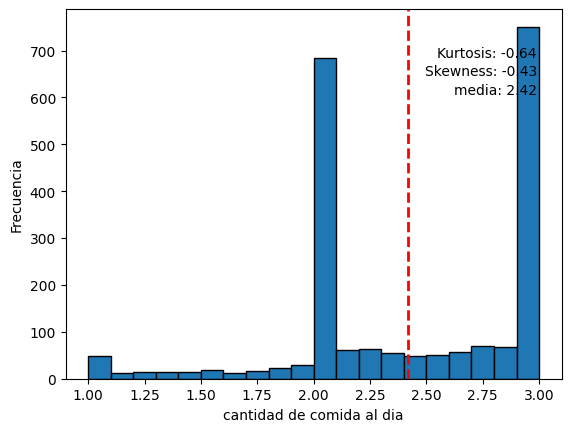

In [16]:
plt.hist(df['FCVC'], bins=20, edgecolor='black')
plt.axvline(df['FCVC'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('cantidad de comida al dia')
plt.ylabel('Frecuencia')

kurtosis = df['FCVC'].kurtosis()
skewness = df['FCVC'].skew()
media=df['FCVC'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

In [17]:

df=fn.redondear_variables(df,['FCVC'])
variables_sin_modificar=['FCVC']

<Axes: xlabel='FCVC'>

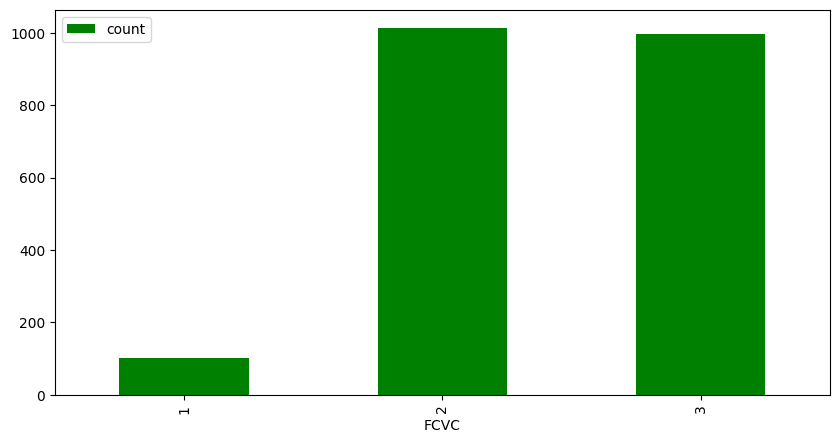

In [18]:
pd.DataFrame( df[ 'FCVC'].value_counts()).sort_values(by='FCVC').plot(kind='bar',figsize=(10,5),color='green')

In [19]:
variables_ordinales.append("FCVC")
pd.crosstab(df["FCVC"], df["NObeyesdad"], normalize="index").round(4) * 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FCVC,,,,,,,
1,22.55,17.65,16.67,20.59,0.00,13.73,8.82
2,8.49,15.30,25.27,13.62,0.00,18.36,18.95
3,16.37,11.45,7.83,13.86,32.53,9.04,8.94


No se realizara ninguna trasformación a esta variable, dado que 1 = nunca, 2 = a veces y  3 = siempre. Tendríamos que hacer un OrdinalEncoder, pero no es necesario.   


## ¿Cuántas comidas principales haces al día?

Podemos ver que a pesar de ser una variable entera, tenemos valores que no corresponden a la variable, por lo que se debe de limpiar la variable para poder trabajar con ella. para esto vamos a redondear los valores a al entero mas cercano y luego convertirlos a enteros.

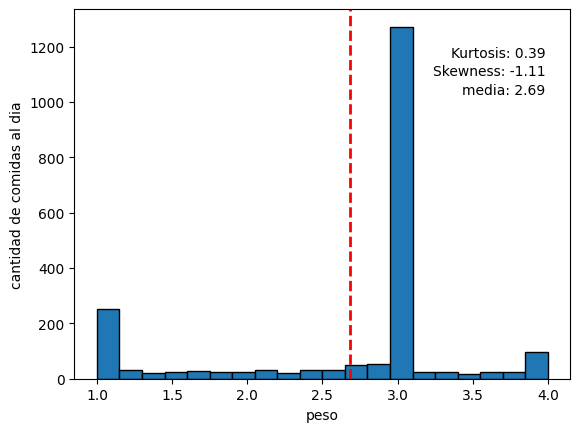

In [20]:
plt.hist(df['NCP'], bins=20, edgecolor='black')
plt.axvline(df['NCP'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('peso')
plt.ylabel('cantidad de comidas al dia')

kurtosis = df['NCP'].kurtosis()
skewness = df['NCP'].skew()
media=df['NCP'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

In [21]:
df=fn.redondear_variables(df,['NCP'])

<Axes: xlabel='NCP'>

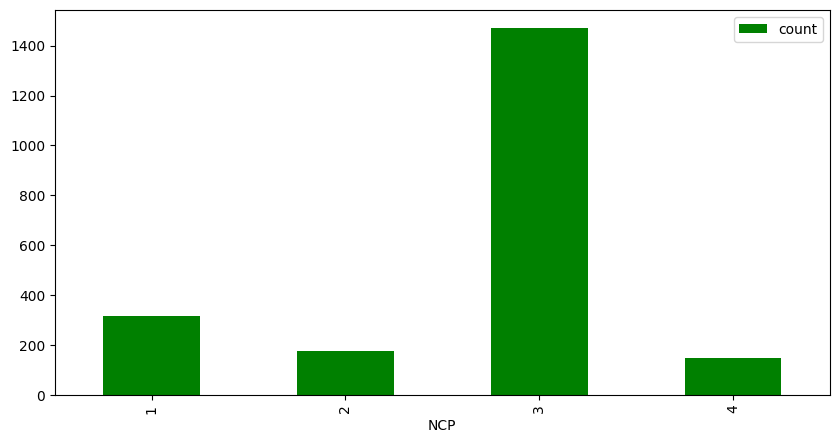

In [22]:
pd.DataFrame( df[ 'NCP'].value_counts()).sort_values(by='NCP').plot(kind='bar',figsize=(10,5),color='green')

In [23]:
variables_numericas.append("NCP")
pd.crosstab(df["NCP"], df["NObeyesdad"], normalize="index").round(4) * 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
NCP,,,,,,,
1,11.71,16.46,25.00,7.59,0.00,24.05,15.19
2,10.23,0.00,26.70,20.45,0.00,13.07,29.55
3,9.86,14.01,15.31,15.51,22.04,10.75,12.52
4,48.32,19.46,0.00,6.04,0.00,22.15,4.03


No se realizara ninguna trasformación a esta variable.

## ¿Comes algún alimento entre comidas?

<Axes: xlabel='CAEC'>

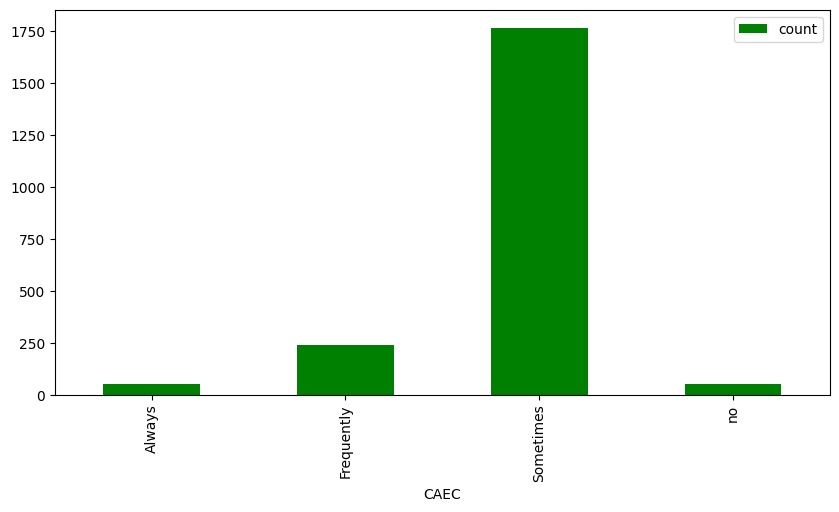

In [24]:
pd.DataFrame( df[ 'CAEC'].value_counts()).sort_values(by='CAEC').plot(kind='bar',figsize=(10,5),color='green')

In [25]:
variables_ordinales.append('CAEC')
pd.crosstab(df["CAEC"], df["NObeyesdad"], normalize="index").round(4) * 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CAEC,,,,,,,
Always,3.77,66.04,11.32,3.77,0.00,9.43,5.66
Frequently,50.00,34.30,2.48,0.41,0.41,5.79,6.61
Sometimes,8.27,9.01,19.15,16.60,18.30,13.37,15.30
no,5.88,19.61,1.96,1.96,0.00,68.63,1.96


Para transformar esta variable utilizaremos el OrdinalEncoder, dado que tenemos una variable ordinal. 

## ¿Fuma usted?

<Axes: xlabel='SMOKE'>

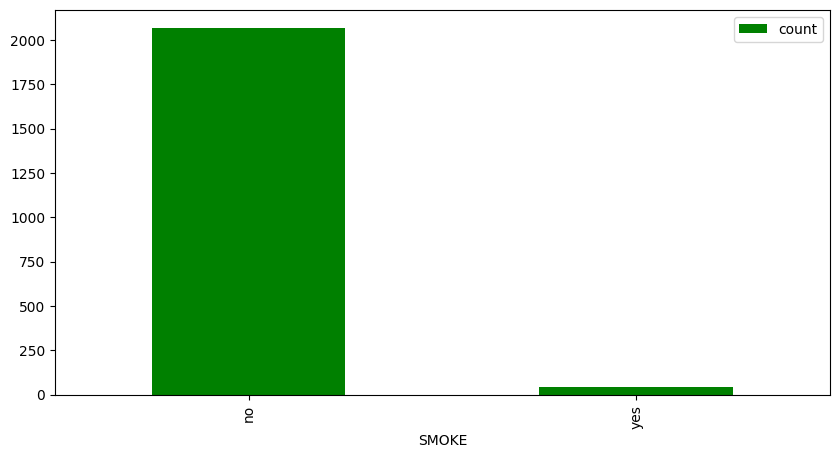

In [26]:
pd.DataFrame( df[ 'SMOKE'].value_counts()).sort_values(by='SMOKE').plot(kind='bar',figsize=(10,5),color='green')

In [27]:
variables_nonimales.append('SMOKE') 
pd.crosstab(df["SMOKE"], df["NObeyesdad"], normalize="index").round(4) * 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SMOKE,,,,,,,
no,13.11,13.26,16.69,13.64,15.63,13.88,13.79
yes,2.27,29.55,13.64,34.09,2.27,6.82,11.36


Para transformar esta variable utilizaremos el OneHotEncoder, dado que tenemos una variable nominal. 

## 	¿Cuánta agua bebes diariamente?

La variable presenta algunos problemas, porque solo deberá tener 1, 2 o 3; 1 = menos de un litro, 2 = 1–2 litros, 3 = más de 2 litros. Pero en la siguiente gráfica se ven algunos valores errados 

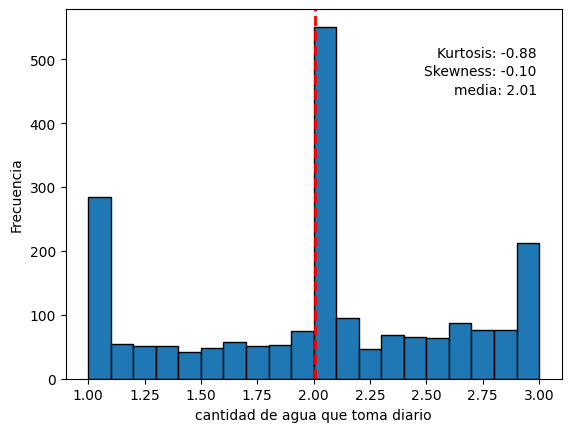

In [28]:
plt.hist(df['CH2O'], bins=20, edgecolor='black')
plt.axvline(df['CH2O'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('cantidad de agua que toma diario')
plt.ylabel('Frecuencia')

kurtosis = df['CH2O'].kurtosis()
skewness = df['CH2O'].skew()
media=df['CH2O'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

<Axes: ylabel='count'>

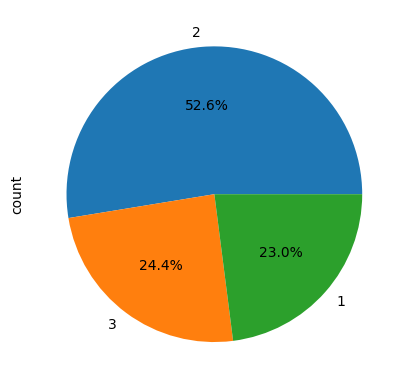

In [29]:
df=fn.redondear_variables(df,['CH2O'])
df['CH2O'].value_counts().plot.pie(autopct='%1.1f%%')

In [30]:
variables_numericas.append("CH2O")
pd.crosstab(df["CH2O"], df["NObeyesdad"], normalize="index").round(4) * 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CH2O,,,,,,,
1,17.32,17.11,14.02,16.91,12.58,12.37,9.69
2,12.79,14.77,15.59,15.95,10.27,13.87,16.76
3,8.91,7.75,21.32,7.36,28.88,14.73,11.05


No se realizara ninguna trasformación a esta variable, dado que es una variable ordinal. Tendríamos que hacer un OrdinalEncoder, pero no es necesario.   


 ## ¿Controlas las calorías que ingieres a diario?

<Axes: ylabel='count'>

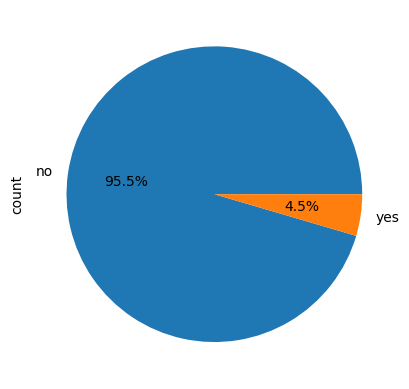

In [31]:
df['SCC'].value_counts().plot.pie(autopct='%1.1f%%')


In [32]:
variables_nonimales.append('SCC')   
pd.crosstab(df["SCC"], df["NObeyesdad"], normalize="index").round(4) * 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SCC,,,,,,,
no,12.41,12.75,17.32,14.69,16.08,12.56,14.19
yes,22.92,31.25,2.08,1.04,0.00,38.54,4.17


Para transformar esta variable utilizaremos el OneHotEncoder, dado que tenemos una variable nominal. 

## ¿Con qué frecuencia realiza actividad física?


La variable presenta algunos problemas, porque solo deberá tener 0, 1, 2 o 3; 0 = ninguno, 1 = 1 a 2 días, 2 = 2 a 4 días, 3 = 4 a 5 días. Pero en la siguiente gráfica se ven algunos valores errados 

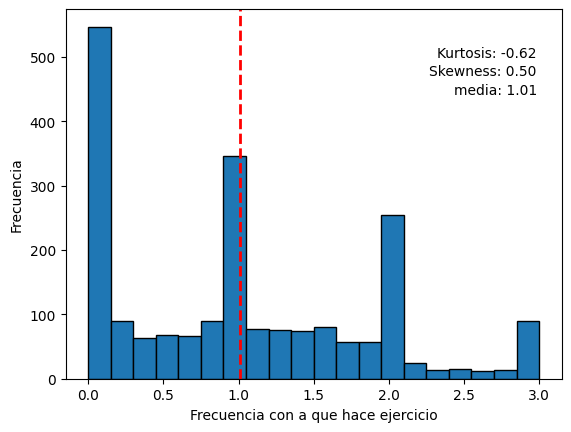

In [33]:
plt.hist(df['FAF'], bins=20, edgecolor='black')
plt.axvline(df['FAF'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Frecuencia con a que hace ejercicio')
plt.ylabel('Frecuencia')

kurtosis = df['FAF'].kurtosis()
skewness = df['FAF'].skew()
media=df['FAF'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

<Axes: ylabel='count'>

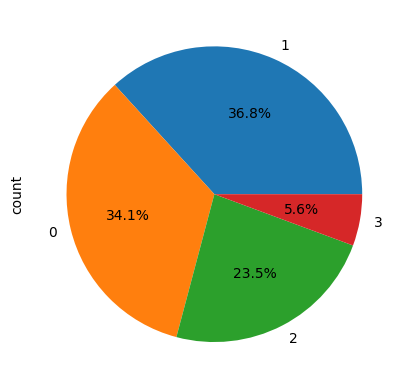

In [34]:
df=fn.redondear_variables(df,['FAF'])
df['FAF'].value_counts().plot.pie(autopct='%1.1f%%')

In [35]:
variables_ordinales.append("FAF")
pd.crosstab(df["FAF"], df["NObeyesdad"], normalize="index").round(4) * 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAF,,,,,,,
0,10.00,11.11,18.19,9.58,25.97,11.67,13.47
1,9.28,12.50,15.85,21.26,8.76,16.24,16.11
2,23.59,13.91,14.52,12.70,13.91,11.29,10.08
3,9.24,34.45,21.01,0.00,0.00,20.17,15.13


No se realizara ninguna trasformación a esta variable, dado que es una variable ordinal. Tendríamos que hacer un OrdinalEncoder, pero no es necesario.   


## ¿Cuánto tiempo utilizas aparatos tecnológicos como el móvil, los videojuegos, la televisión, el ordenador y otros?

La variable presenta algunos problemas, porque solo deberá tener  0, 1 o 2; 0 = 0–2 horas, 1 = 3–5 horas, 2 = más de 5 horas. Pero en la siguiente gráfica se ven algunos valores errados 

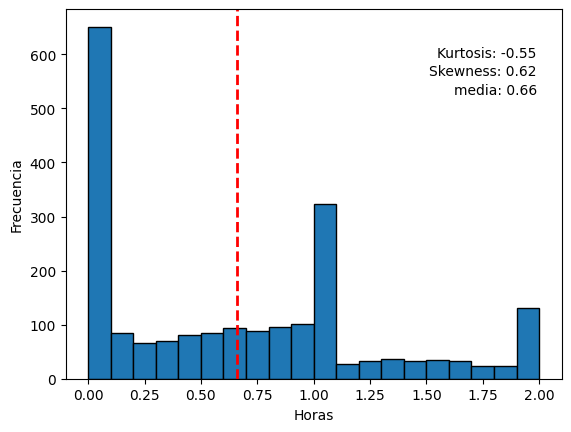

In [36]:
plt.hist(df['TUE'], bins=20, edgecolor='black')
plt.axvline(df['TUE'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Horas')
plt.ylabel('Frecuencia')

kurtosis = df['TUE'].kurtosis()
skewness = df['TUE'].skew()
media=df['TUE'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

<Axes: ylabel='count'>

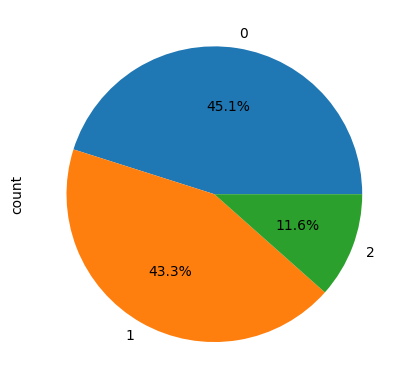

In [37]:
df=fn.redondear_variables(df,['TUE'])
df['TUE'].value_counts().plot.pie(autopct='%1.1f%%')

In [38]:
variables_ordinales.append("TUE")
pd.crosstab(df["TUE"], df["NObeyesdad"], normalize="index").round(4) * 100


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
TUE,,,,,,,
0,9.87,13.55,17.75,18.17,11.45,17.23,11.97
1,13.88,13.33,13.22,11.26,23.50,8.96,15.85
2,20.90,14.75,25.00,8.61,0.00,18.03,12.70


No se realizara ninguna trasformación a esta variable, dado que es una variable ordinal. Tendríamos que hacer un OrdinalEncoder, pero no es necesario.   


## ¿Con qué frecuencia bebe alcohol?


La variable presenta algunos problemas, porque solo deberá tener  01, 2, 3 o 4; 1= nunca, 2 = a veces, 3 = frecuentemente, 4 = siempre. Pero en la siguiente gráfica se ven algunos valores errados 

<Axes: ylabel='count'>

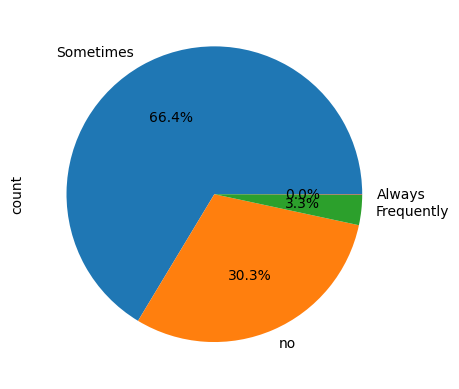

In [39]:
df['CALC'].value_counts().plot.pie(autopct='%1.1f%%')

In [40]:
variables_ordinales.append('CALC')
pd.crosstab(df["CALC"], df["NObeyesdad"], normalize="index").round(4) * 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CALC,,,,,,,
Always,0.00,100.00,0.00,0.00,0.00,0.00,0.00
Frequently,1.43,25.71,20.00,2.86,0.00,22.86,27.14
Sometimes,10.99,11.49,12.28,15.99,23.05,15.99,10.21
no,18.31,16.74,25.82,11.11,0.16,7.82,20.03


Para transformar esta variable utilizaremos el OrdinalEncoder, dado que tenemos una variable ordinal. 

## ¿Qué medio de transporte utiliza habitualmente?

<Axes: xlabel='MTRANS'>

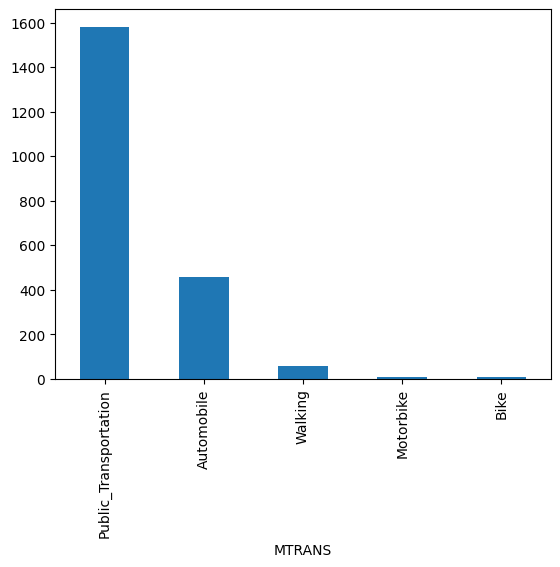

In [41]:
df['MTRANS'].value_counts().plot.bar()

In [42]:
variables_nonimales.append('MTRANS')    
pd.crosstab(df["MTRANS"], df["NObeyesdad"], normalize="index").round(4) * 100

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
MTRANS,,,,,,,
Automobile,10.07,9.85,24.07,20.79,0.22,14.44,20.57
Bike,0.00,57.14,0.00,14.29,0.00,28.57,0.00
Motorbike,0.00,54.55,27.27,0.00,0.00,9.09,9.09
Public_Transportation,13.92,12.66,14.94,12.66,20.44,13.42,11.96
Walking,10.71,57.14,3.57,1.79,0.00,16.07,10.71


Para transformar esta variable utilizaremos el OneHotEncoder, dado que tenemos una variable nominal. 

## CODIFICACIÓN DE LA BASE A TRABAJAR 

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler,OneHotEncoder

categorical_encoder = OneHotEncoder(handle_unknown='ignore')

numerical_pipe = MinMaxScaler()

ordinal_encoder = OrdinalEncoder()

preprocessing = ColumnTransformer(
    [
        ("Codificación de Categóricas", categorical_encoder, variables_nonimales),
        ("Transformación de numéricas", numerical_pipe, variables_numericas),
        ("ordimal 1",ordinal_encoder,variables_ordinales),
    ],
    verbose_feature_names_out=False,
)


flujo = Pipeline(
    [
        ("Preprocesamiento", preprocessing),
 
    ]
)
flujo.fit(df)


Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Codificación de Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Transformación de numéricas',
                                                  MinMaxScaler(),
                                                  ['Age', 'NCP', 'CH2O']),
                                                 ('ordimal 1', OrdinalEncoder(),
                                                  ['FCVC', 'CAEC', 'FAF', 'TUE',
                                                   'CALC'])],
                                   verbose_feature_names_out=False))])

In [44]:
primer_paso=flujo['Preprocesamiento']
X=pd.DataFrame(primer_paso.transform(df), columns=primer_paso.get_feature_names_out())
X.columns


Index(['Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'Age', 'NCP', 'CH2O', 'FCVC', 'CAEC', 'FAF', 'TUE', 'CALC'],
      dtype='object')

In [45]:

categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

ordinal_encoder = OrdinalEncoder(categories=[categories])
Y = ordinal_encoder.fit_transform(df[['NObeyesdad']])
df_codificados= pd.merge( pd.DataFrame(Y, columns=['NObeyesdad']),X,left_index=True, right_index=True)
df_codificados
#df_codificados.to_csv('../Datos/obesity_codificado.csv',index=False)

,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,NCP,CH2O,FCVC,CAEC,FAF,TUE,CALC
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.148936,0.666667,0.5,1.0,2.0,0.0,1.0,3.0
1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.148936,0.666667,1.0,2.0,2.0,3.0,0.0,2.0
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.191489,0.666667,0.5,1.0,2.0,2.0,1.0,1.0
3,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.276596,0.666667,0.5,2.0,2.0,2.0,0.0,1.0
4,3.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.170213,0.000000,0.5,1.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,6.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.148443,0.666667,0.5,2.0,2.0,2.0,1.0,2.0
2107,6.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.169850,0.666667,0.5,2.0,2.0,1.0,1.0,2.0
2108,6.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.181362,0.666667,0.5,2.0,2.0,1.0,1.0,2.0
2109,6.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.220467,0.666667,1.0,2.0,2.0,1.0,1.0,2.0


## Reducción de dimensionalidad

### Análisis de componentes principales    

Podemos observar que con 3 componentes principales resumimos el 50% de la varianza explicada, mientras que con 6 componentes reunimos más del 74 % de la varianza explicada. 

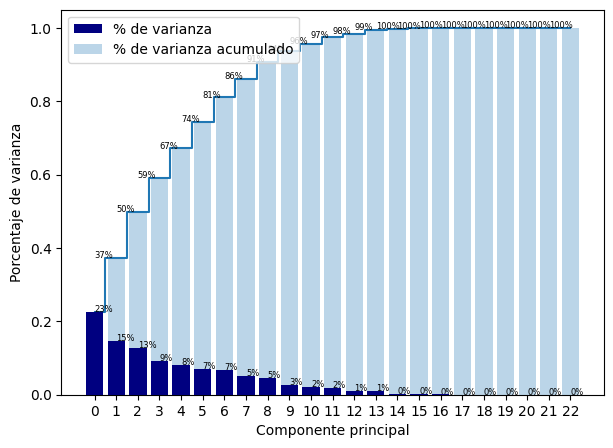

In [46]:
from sklearn.decomposition import PCA

# hacemos el modelo 
acp = PCA(n_components=None)
acp.fit_transform(X)

# Calculamos la varianza explicada por las  primeras componenetes principales 
explained_variance=acp.explained_variance_ratio_
cum_explained_variance=acp.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(figsize = (7, 5))
x_range=range(23)
ax.bar(x = x_range, height = explained_variance, zorder = 20,
       color = "navy", label = "% de varianza")
ax.bar(x = x_range, height = cum_explained_variance, alpha = 0.3,
       label = "% de varianza acumulado")
ax.step(x = x_range, y = cum_explained_variance, where = "mid")
ax.set_xlabel("Componente principal")
ax.set_ylabel("Porcentaje de varianza")
for i, v in enumerate(explained_variance):
    ax.text(x = i , y = v , s = str(round(v * 100)) + "%",fontsize=6)
for i, v in enumerate(cum_explained_variance[1:], start = 0):
    ax.text(x = i , y = v , s = str(round(v * 100)) + "%",fontsize=6)
ax.set_xticks(x_range, labels = x_range)
ax.legend()
plt.show()



Si  graficamos las dos primeras componentes principales (que resumen el 37% de la varianza explicada) no observamos una partición muy marcada en el dataset según el nivel de obesidad de la persona con respecto a sus hábitos.  

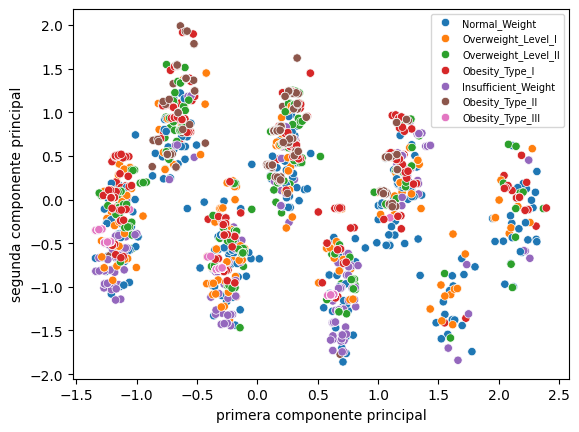

In [51]:
acp = PCA(n_components=2)
acp_=acp.fit_transform(X)
acp_dim = pd.DataFrame(data = acp_)
acp_dim['NObeyesdad'] = df["NObeyesdad"]
acp_dim.columns=['primera componente principal','segunda componente principal','NObeyesdad']
sns.scatterplot(data=acp_dim, x="primera componente principal",y="segunda componente principal", hue='NObeyesdad')
plt.legend(loc="best",fontsize=7)

In [49]:
acp.components_.shape

(23, 23)

In [ ]:
x_new

array([[-1.04493447, -0.31170056],
       [ 1.57867475, -1.54447349],
       [ 1.16516301,  0.17304686],
       ...,
       [-0.31665048, -0.79124172],
       [-0.29248005, -0.78250629],
       [-0.29225641, -0.78336425]])

In [ ]:
print(range(18))

range(0, 18)
